In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [2]:
historic = pd.read_csv('pipeline_historic.csv', sep=';')

In [3]:
links = historic['link'].tolist()

In [4]:
links = [x for x in links if x[:4] == '2021']

In [5]:
links

['2021-01-01_156_-_Base_de_Dados.csv',
 '2021-02-01_156_-_Base_de_Dados.csv',
 '2021-03-01_156_-_Base_de_Dados.csv',
 '2021-04-01_156_-_Base_de_Dados.csv',
 '2021-05-01_156_-_Base_de_Dados.csv',
 '2021-06-01_156_-_Base_de_Dados.csv',
 '2021-07-01_156_-_Base_de_Dados.csv',
 '2021-08-01_156_-_Base_de_Dados.csv',
 '2021-09-01_156_-_Base_de_Dados.csv',
 '2021-10-01_156_-_Base_de_Dados.csv',
 '2021-11-01_156_-_Base_de_Dados.csv']

In [6]:
df_columns = pd.read_csv('raw_data/'+links[0], sep=';', nrows=1)
col_names = df_columns.columns.tolist()
col_names.append('EXTRA')

In [7]:
small_dfs = []
soma = 0
for link in links:
    small_df = pd.read_csv('raw_data/' + link, sep=';', skiprows=2, names=col_names)
    print(len(small_df))
    soma+=len(small_df)
    small_dfs.append(small_df)
print(soma)

28650
25606
24068
26005
24023
27585
27721
30605
29896
27451
25974
297584


In [8]:
large_df = pd.concat(small_dfs, ignore_index=True)

In [9]:
len(large_df)

297584

In [10]:
large_df.head()

,",SOLICITACAO",TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA
0,"2,""8683793",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,08:56:22,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,NOVO MUNDO,...,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...
1,"3,""8683985",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,10:11:24,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,NEGLIGÊNCIA,Sigiloso,Sigiloso,BOA VISTA,...,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...
2,"4,""8684025",SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,10:25:31,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,"Solicita abordagem para si mesmo. Fabiano, Cam...","República Argentina, 4822",NOVO MUNDO,...,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
3,"5,""8684317",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,11:59:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CAMPO DE SANTANA,...,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...
4,"6,""8684808",SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:05:08,ABORDAGEM SOCIAL DE RUA,ALCOOLIZADAS/DROGADAS,Solicita abordagem social para um rapaz que es...,"DOUTOR ROBERTO BARROZO, 1492",SAO FRANCISCO,...,NENHUM,Rapaz usando blusa e camiseta e enrolado no co...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."


In [11]:
large_df['SOLICITACAO'] = large_df[',SOLICITACAO'].str[-7:]

In [12]:
large_df.head(50)

,",SOLICITACAO",TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO
0,"2,""8683793",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,08:56:22,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,NOVO MUNDO,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8683793
1,"3,""8683985",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,10:11:24,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,NEGLIGÊNCIA,Sigiloso,Sigiloso,BOA VISTA,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8683985
2,"4,""8684025",SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,10:25:31,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,"Solicita abordagem para si mesmo. Fabiano, Cam...","República Argentina, 4822",NOVO MUNDO,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684025
3,"5,""8684317",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,11:59:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CAMPO DE SANTANA,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684317
4,"6,""8684808",SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:05:08,ABORDAGEM SOCIAL DE RUA,ALCOOLIZADAS/DROGADAS,Solicita abordagem social para um rapaz que es...,"DOUTOR ROBERTO BARROZO, 1492",SAO FRANCISCO,...,Rapaz usando blusa e camiseta e enrolado no co...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684808
5,"7,""8684867",SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:26:10,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,Solicita abordagem para pessoa(s) perdidas ou ...,"Euclides Padilha dos Santos, 20",UBERABA,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",Abordagem realizada. Pessoa foi encaminhada pa...,8684867
6,"8,""8684957",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:08:15,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,NOVO MUNDO,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684957
7,"9,""8684977",DENÚNCIA,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,01/12/2020,16:13:49,CORONAVÍRUS (COVID-19),FISCALIZAÇÃO DE COMÉRCIOS DE INTERESSE À SAÚDE...,DENUNCIANTE INFORMA QUE OS SUSPEITOS DE NOMES ...,"MARECHAL DEODORO, 630",CENTRO,...,DENÚNCIA RECEBIDA DO 181 E FORMALIZADA PELA DE...,M,NaN,NaN,,CIDADÃO,SECRETARIA MUNICIPAL DA SAÚDE,"Conclusão - Meio de resposta """"Nenhum""""",EM REPOSTA À DENÚNCIA REALIZADA AO SISTEMA 156...,8684977
8,"10,""8685050",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:33:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CIDADE INDUSTRIAL,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8685050
9,"11,""8685109",DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,17:00:02,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,SITIO CERCADO,...,Atras da Dina Pizza. Travessa Acesso Marin Zan...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8685109


In [13]:
large_df = large_df.drop(',SOLICITACAO', 1)

C:\Users\fer-x\AppData\Local\Temp/ipykernel_21192/1158025133.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  large_df = large_df.drop(',SOLICITACAO', 1)


In [14]:
large_df.head(50)

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,...,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO
0,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,08:56:22,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8683793
1,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,10:11:24,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,NEGLIGÊNCIA,Sigiloso,Sigiloso,BOA VISTA,Unidade Regional Boa Vista,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8683985
2,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,10:25:31,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,"Solicita abordagem para si mesmo. Fabiano, Cam...","República Argentina, 4822",NOVO MUNDO,Unidade Regional Pinheirinho,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684025
3,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,11:59:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CAMPO DE SANTANA,Unidade Regional Tatuquara,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684317
4,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:05:08,ABORDAGEM SOCIAL DE RUA,ALCOOLIZADAS/DROGADAS,Solicita abordagem social para um rapaz que es...,"DOUTOR ROBERTO BARROZO, 1492",SAO FRANCISCO,Unidade Regional Matriz,...,Rapaz usando blusa e camiseta e enrolado no co...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684808
5,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:26:10,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,Solicita abordagem para pessoa(s) perdidas ou ...,"Euclides Padilha dos Santos, 20",UBERABA,Unidade Regional Cajuru,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",Abordagem realizada. Pessoa foi encaminhada pa...,8684867
6,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:08:15,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684957
7,DENÚNCIA,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,01/12/2020,16:13:49,CORONAVÍRUS (COVID-19),FISCALIZAÇÃO DE COMÉRCIOS DE INTERESSE À SAÚDE...,DENUNCIANTE INFORMA QUE OS SUSPEITOS DE NOMES ...,"MARECHAL DEODORO, 630",CENTRO,Unidade Regional Matriz,...,DENÚNCIA RECEBIDA DO 181 E FORMALIZADA PELA DE...,M,NaN,NaN,,CIDADÃO,SECRETARIA MUNICIPAL DA SAÚDE,"Conclusão - Meio de resposta """"Nenhum""""",EM REPOSTA À DENÚNCIA REALIZADA AO SISTEMA 156...,8684977
8,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:33:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CIDADE INDUSTRIAL,Unidade Regional CIC,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8685050
9,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,17:00:02,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,SITIO CERCADO,Unidade Regional Bairro Novo,...,Atras da Dina Pizza. Travessa Acesso Marin Zan...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8685109


In [15]:
logradouro_fix = [x for x in large_df['LOGRADOURO_ASS'] if ',' not in str(x)]

In [16]:
logradouro_fix = set(logradouro_fix)

In [17]:
logradouro_fix

{'Sigiloso', nan}

In [18]:
# Acreditei que fosse algum problema o logradouro estar como sigiloso
# Mas agora entendi que é por causa do tipo de denuncia
large_df.loc[large_df['LOGRADOURO_ASS'] == 'Sigiloso']

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,...,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO
0,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,08:56:22,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8683793
1,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,10:11:24,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,NEGLIGÊNCIA,Sigiloso,Sigiloso,BOA VISTA,Unidade Regional Boa Vista,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8683985
3,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,11:59:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CAMPO DE SANTANA,Unidade Regional Tatuquara,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684317
6,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:08:15,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684957
8,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:33:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CIDADE INDUSTRIAL,Unidade Regional CIC,...,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8685050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291164,Elogio,INSTITUTO DAS CIDADES INTELIGENTES,22/10/2021,15:14:22,CRAS - Centro de Referência da Assistência Social,Reclamação/Elogio/Informações,Sigiloso,Sigiloso,CENTRO,Unidade Regional Matriz,...,NaN,M,Centro,Matriz,17/11/1982,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",Agradecemos os elogios e informamos que foram ...,9170478
292823,Elogio,INSTITUTO DAS CIDADES INTELIGENTES,25/10/2021,10:52:48,CRAS - Centro de Referência da Assistência Social,Reclamação/Elogio/Informações,Sigiloso,Sigiloso,SAO BRAZ,Unidade Regional Santa Felicidade,...,NaN,F,São Braz,NaN,21/04/1960,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Conclusão - Automática,Agradecemos os elogios e informamos que foram ...,9173214
292824,Elogio,INSTITUTO DAS CIDADES INTELIGENTES,25/10/2021,10:50:08,Cadastro Único do Governo Federal,Utilização do benefício,Sigiloso,Sigiloso,SAO BRAZ,Unidade Regional Santa Felicidade,...,NaN,F,São Braz,NaN,21/04/1960,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Conclusão - Automática,Agradecemos os elogios e enfatizamos a importâ...,9173205
293847,Denúncia,FUNDAÇÃO DE AÇÃO SOCIAL,22/10/2021,10:43:29,Atendimento social em domicílio - Pessoa com d...,Abandono - Maus tratos - Negligência,Sigiloso,Sigiloso,CACHOEIRA,Unidade Regional Boa Vista,...,NaN,F,Cachoeira,NaN,10/02/1980,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Conclusão - Automática,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,9169893


In [19]:
pd.set_option('max_columns', None)

In [20]:
large_df.head(50)

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO
0,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,08:56:22,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8683793
1,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,10:11:24,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,NEGLIGÊNCIA,Sigiloso,Sigiloso,BOA VISTA,Unidade Regional Boa Vista,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8683985
2,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,10:25:31,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,"Solicita abordagem para si mesmo. Fabiano, Cam...","República Argentina, 4822",NOVO MUNDO,Unidade Regional Pinheirinho,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684025
3,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,11:59:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CAMPO DE SANTANA,Unidade Regional Tatuquara,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684317
4,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:05:08,ABORDAGEM SOCIAL DE RUA,ALCOOLIZADAS/DROGADAS,Solicita abordagem social para um rapaz que es...,"DOUTOR ROBERTO BARROZO, 1492",SAO FRANCISCO,Unidade Regional Matriz,NENHUM,Rapaz usando blusa e camiseta e enrolado no co...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",8684808
5,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/12/2020,15:26:10,ABORDAGEM SOCIAL DE RUA,PERDIDA/DESORIENTADA,Solicita abordagem para pessoa(s) perdidas ou ...,"Euclides Padilha dos Santos, 20",UBERABA,Unidade Regional Cajuru,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",Abordagem realizada. Pessoa foi encaminhada pa...,8684867
6,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:08:15,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,NOVO MUNDO,Unidade Regional Pinheirinho,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8684957
7,DENÚNCIA,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,01/12/2020,16:13:49,CORONAVÍRUS (COVID-19),FISCALIZAÇÃO DE COMÉRCIOS DE INTERESSE À SAÚDE...,DENUNCIANTE INFORMA QUE OS SUSPEITOS DE NOMES ...,"MARECHAL DEODORO, 630",CENTRO,Unidade Regional Matriz,NENHUM,DENÚNCIA RECEBIDA DO 181 E FORMALIZADA PELA DE...,M,NaN,NaN,,CIDADÃO,SECRETARIA MUNICIPAL DA SAÚDE,"Conclusão - Meio de resposta """"Nenhum""""",EM REPOSTA À DENÚNCIA REALIZADA AO SISTEMA 156...,8684977
8,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,16:33:29,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,NEGLIGÊNCIA,Sigiloso,Sigiloso,CIDADE INDUSTRIAL,Unidade Regional CIC,NENHUM,NaN,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,11 - INFORMAÇÃO AO CONSELHO TUTELAR DA ÁREA DE...,8685050
9,DENÚNCIA,FUNDAÇÃO DE AÇÃO SOCIAL,01/12/2020,17:00:02,ATENDIMENTO SOCIAL EM DOMICÍLIO - IDOSO,VIOLÊNCIA FÍSICA,Sigiloso,Sigiloso,SITIO CERCADO,Unidade Regional Bairro Novo,NENHUM,Atras da Dina Pizza. Travessa Acesso Marin Zan...,M,NaN,NaN,,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Impressão,22 - SOLICITAÇÃO ABERTA PELO SETOR DE TRIAGEM ...,8685109


In [21]:
large_df['DATA'] = pd.to_datetime(large_df['DATA'])

In [22]:
large_df.loc[large_df['ASSUNTO'] == 'ASSUNTO']

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO


In [23]:
large_df = large_df.loc[large_df['DATA'] >= '2021-01-01']

In [24]:
large_df.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20]

BAIRRO_ASS
CENTRO               18576
CIDADE INDUSTRIAL    17953
SITIO CERCADO        12054
BOQUEIRAO             9911
CAJURU                9821
NOVO MUNDO            8622
UBERABA               7269
CAPAO RASO            7268
JARDIM BOTANICO       7156
XAXIM                 7094
AGUA VERDE            6521
PORTAO                6299
SANTA FELICIDADE      6168
REBOUCAS              5310
PINHEIRINHO           4919
BAIRRO ALTO           4820
BOA VISTA             4777
ALTO BOQUEIRAO        4592
BACACHERI             4582
SANTA CANDIDA         4562
dtype: int64

In [25]:
large_df.groupby('ASSUNTO').size().sort_values(ascending=False)[:20]

ASSUNTO
COLETA                                      47681
TRÂNSITO                                    28369
ILUMINAÇÃO PÚBLICA - VIA PÚBLICA            27644
ABORDAGEM SOCIAL DE RUA - ADULTO E IDOSO    25265
POSTO DE SAÚDE                              10420
Coleta                                       9591
Trânsito                                     8571
CORONAVÍRUS (COVID-19)                       7888
PAVIMENTAÇÃO                                 6376
Abordagem social de rua - Adulto e Idoso     6016
POLUIÇÃO                                     3371
Iluminação pública - via pública             3288
Iluminação pública - Via pública             3253
ANIMAIS DOMÉSTICOS                           3210
DRENAGEM                                     3079
ÁRVORE                                       2610
OUTROS SETORES SMS                           2449
Posto de saúde                               2357
PASSEIO                                      2266
FAUNA SINANTRÓPICA                        

In [26]:
 large_df.groupby(large_df['DATA'].dt.strftime('%m')).size()

DATA
01    23183
02    20121
03    22441
04    23180
05    27045
06    26035
07    27203
08    27305
09    26946
10    24732
11    10294
12    10414
dtype: int64

In [27]:
 large_df.loc[large_df['DATA'].dt.strftime('%m') == '12']

,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,EXTRA,SOLICITACAO
42558,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-01,00:01:17,FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,LIMPEZA,Solicita fiscalização quanto a limpeza de um t...,"BOM SUCESSO, 204",ALTO BOQUEIRAO,Unidade Regional Boqueirao,EMAIL,NaN,F,ALTO BOQUEIRAO,NaN,15/02/1981,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Pesquisa não realizada: Recusa do Cidadão,"O protocolo foi cancelado conforme solicitado.""",8747437
42562,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-01,00:51:36,ABORDAGEM SOCIAL DE RUA - ADULTO E IDOSO,PERDIDA/DESORIENTADA,Solicita abordagem para um senhor de idade per...,"Cândido de Abreu, 535",CENTRO CIVICO,Unidade Regional Matriz,EMAIL,NaN,M,TARUMA,NaN,28/03/1988,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Conclusão - Automática,"REALIZADO RETORNO DOMICILIAR.""",8747442
42563,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-01,01:39:39,ILUMINAÇÃO PÚBLICA - VIA PÚBLICA,MANUTENÇÃO DE LUMINÁRIAS EM VIAS PÚBLICAS,Solicita a manutenção de luminária.,"Castro Alves, 785",BATEL,Unidade Regional Matriz,EMAIL,Não soube informar a placa de id do poste.,M,BATEL,NaN,14/12/1989,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Pesquisa realizada,"SOLICITACAO ATENDIDA""",8747450
42564,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-01,01:48:25,ABORDAGEM SOCIAL DE RUA - ADULTO E IDOSO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,Solicita abordagem para si mesmo. Veste shorts...,"Catulo da Paixão Cearense, 11",CAJURU,Unidade Regional Cajuru,EMAIL,NaN,M,Cajuru,NaN,08/05/1996,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Conclusão - Automática,Abordagem realizada. A pessoa foi encaminhada ...,8747452
42565,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-01,02:31:45,ILUMINAÇÃO PÚBLICA - VIA PÚBLICA,MANUTENÇÃO DE LUMINÁRIAS EM VIAS PÚBLICAS,Solicita a manutenção de luminária.,"Capitao Clementino Parana, 104",AGUA VERDE,Unidade Regional Portao,EMAIL,NaN,F,AGUA VERDE,Unidade Regional Portao,02/09/1990,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Conclusão - Automática,"SOLICITACAO ATENDIDA""",8747455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295800,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-10,20:14:06,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para si mesmo. Informa que ...,"Avenida República Argentina, 3445",PORTAO,Unidade Regional Portao,NENHUM,NaN,M,Portão,NaN,08/04/1971,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"Conclusão - Meio de resposta """"Nenhum""""",A pessoa da solicitação já faz parte da rede d...,9155364
295801,Solicitação,NaN,2021-12-10,20:22:37,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua José Lins do Rego, 290",BAIRRO ALTO,Unidade Regional Boa Vista,EMAIL,NaN,F,Bairro Alto,Boa Vista,20/11/1993,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Pesquisa realizada,"O protocolo foi cancelado conforme solicitado.""",9155374
295802,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-10,21:37:31,Iluminação pública - Via pública,Manutenção de luminárias em vias públicas,Solicita a manutenção de luminária.,Travessa Cipriana Gonçalves Dos Santos Cardoso...,SITIO CERCADO,Unidade Regional Bairro Novo,EMAIL,NaN,F,Sítio Cercado,NaN,16/05/1985,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Conclusão - Automática,"SOLICITACAO ATENDIDA""",9155420
295803,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2021-12-10,22:46:21,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para si própria com calça ...,"Rua Tibagi, 692",CENTRO,Unidade Regional Matriz,NENHUM,NaN,F,Centro,NaN,28/07/1988,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Revisado pelo Supervisor,A pessoa da solicitação já faz parte da rede d...,9155450


In [28]:
# a principio alguns dados estao com a data errada
# acredito que sejam de dezembro de 2020
# para evitar problemas vou retira-los do conjunto de dados
large_df = large_df.loc[large_df['DATA'] < '2021-12-01']

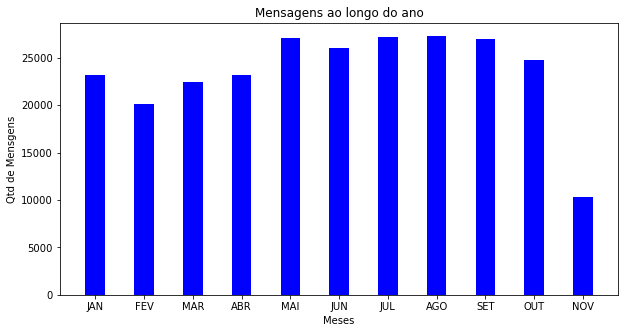

In [29]:
months = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV']
values = large_df.groupby(large_df['DATA'].dt.strftime('%m')).size()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(months, values, color ='blue',
        width = 0.4)

plt.xlabel("Meses")
plt.ylabel("Qtd de Mensgens")
plt.title("Mensagens ao longo do ano")
plt.show()

In [30]:
large_df['ASSUNTO'] = large_df['ASSUNTO'].apply(lambda x: unidecode(str(x)).strip().upper())

In [31]:
list(large_df.groupby('ASSUNTO').size().sort_values(ascending=False)[:20].keys())

['COLETA',
 'TRANSITO',
 'ILUMINACAO PUBLICA - VIA PUBLICA',
 'ABORDAGEM SOCIAL DE RUA - ADULTO E IDOSO',
 'POSTO DE SAUDE',
 'CORONAVIRUS (COVID-19)',
 'PAVIMENTACAO',
 'ANIMAIS DOMESTICOS',
 'POLUICAO',
 'DRENAGEM',
 'ARVORE',
 'OUTROS SETORES SMS',
 'PASSEIO',
 'FAUNA SINANTROPICA',
 'MOTORISTAS, COBRADORES E DEMAIS FUNCIONARIOS DO TRANSPORTE',
 'FISCALIZACAO DE TERRENOS BALDIOS OU EDIFICADOS',
 'VIOLENCIA CONTRA CRIANCA E ADOLESCENTE',
 'SEMAFORO',
 'UNIDADE DE SAUDE 24H',
 'DISQUE SOLIDARIEDADE']

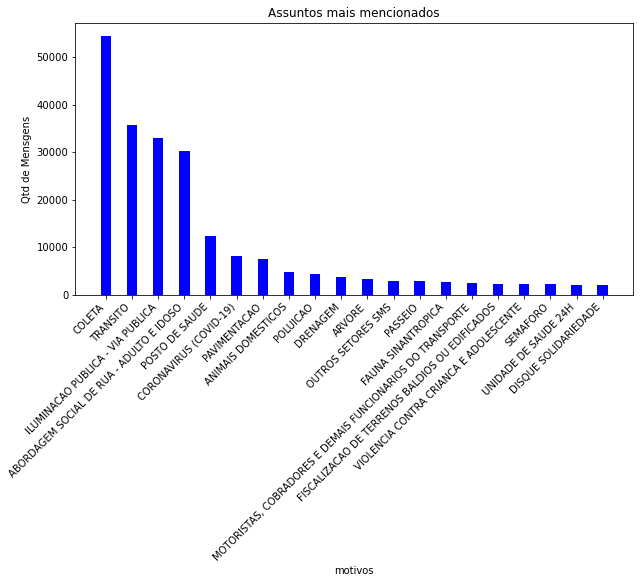

In [32]:
motives = list(large_df.groupby('ASSUNTO').size().sort_values(ascending=False)[:20].keys())
values = large_df.groupby('ASSUNTO').size().sort_values(ascending=False)[:20]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(motives, values, color ='blue',
        width = 0.4)

plt.xlabel("motivos")
plt.ylabel("Qtd de Mensgens")
plt.title("Assuntos mais mencionados")
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
large_df.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20]

BAIRRO_ASS
CENTRO               17942
CIDADE INDUSTRIAL    17222
SITIO CERCADO        11608
BOQUEIRAO             9541
CAJURU                9406
NOVO MUNDO            8315
UBERABA               6975
CAPAO RASO            6949
JARDIM BOTANICO       6898
XAXIM                 6815
AGUA VERDE            6278
PORTAO                6052
SANTA FELICIDADE      5924
REBOUCAS              5084
PINHEIRINHO           4729
BAIRRO ALTO           4627
BOA VISTA             4585
ALTO BOQUEIRAO        4405
SANTA CANDIDA         4394
BACACHERI             4392
dtype: int64

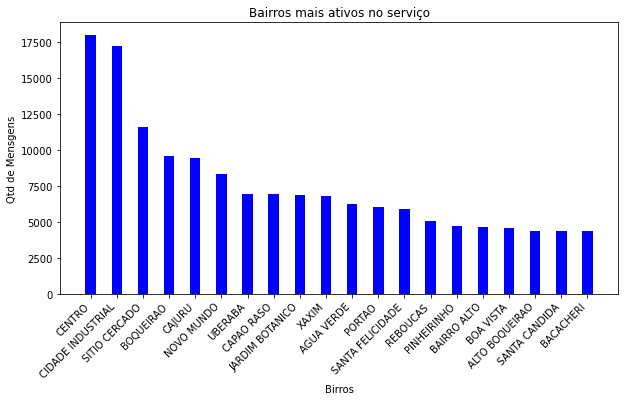

In [34]:
motives = list(large_df.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20].keys())
values = large_df.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(motives, values, color ='blue',
        width = 0.4)

plt.xlabel("Birros")
plt.ylabel("Qtd de Mensgens")
plt.title("Bairros mais ativos no serviço")
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
df_coleta = large_df.loc[large_df['ASSUNTO'] == 'COLETA']

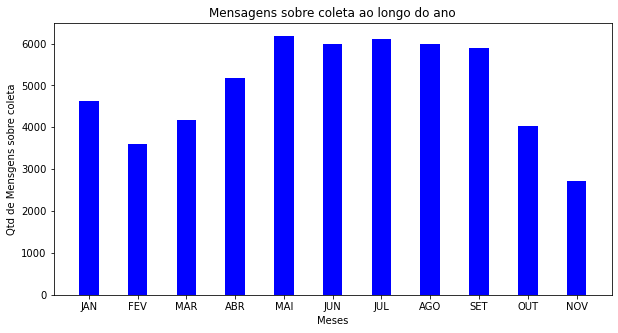

In [36]:
months = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV']
values = df_coleta.groupby(df_coleta['DATA'].dt.strftime('%m')).size()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(months, values, color ='blue',
        width = 0.4)

plt.xlabel("Meses")
plt.ylabel("Qtd de Mensgens sobre coleta")
plt.title("Mensagens sobre coleta ao longo do ano")
plt.show()

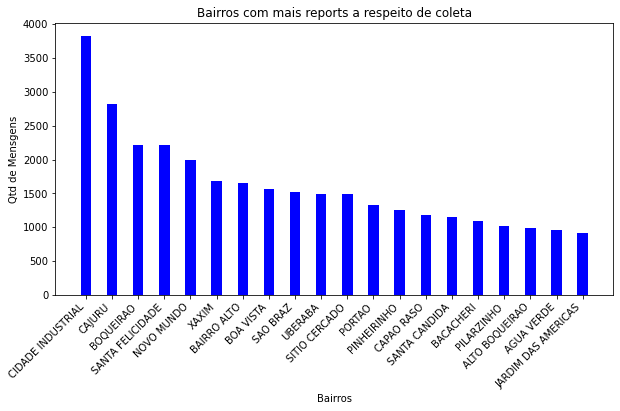

In [37]:
motives = list(df_coleta.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20].keys())
values = df_coleta.groupby('BAIRRO_ASS').size().sort_values(ascending=False)[:20]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(motives, values, color ='blue',
        width = 0.4)

plt.xlabel("Bairros")
plt.ylabel("Qtd de Mensgens")
plt.title("Bairros com mais reports a respeito de coleta")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Por mais que o centro seja o bairro com o maior numero de interações
# Praticamente não há reports de de a respeito de coleta

In [38]:
df_coleta_CIC = df_coleta.loc[large_df['BAIRRO_ASS'] == 'CIDADE INDUSTRIAL']

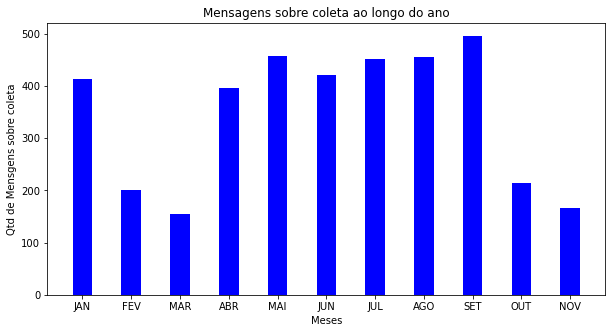

In [39]:
months = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV']
values = df_coleta_CIC.groupby(df_coleta_CIC['DATA'].dt.strftime('%m')).size()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(months, values, color ='blue',
        width = 0.4)

plt.xlabel("Meses")
plt.ylabel("Qtd de Mensgens sobre coleta")
plt.title("Mensagens sobre coleta ao longo do ano")
plt.show()